In [59]:
import os 
from dotenv import load_dotenv
load_dotenv()

True

In [60]:
from langchain_openai import AzureChatOpenAI

llm = AzureChatOpenAI(
    azure_endpoint=os.getenv("AZURE_OPENAI_ENDPOINT"),
    azure_deployment=os.getenv("AZURE_OPENAI_DEPLOYMENT_NAME"),
    api_version=os.getenv("AZURE_OPENAI_API_VERSION"),
    api_key=os.getenv("AZURE_OPENAI_API_KEY")
)

In [61]:
result = llm.invoke("Hi")
print(result.content)

Hello! How can I assist you today?


In [62]:
from langgraph.graph import StateGraph, START, END

#### Implementation using Pydantic

In [63]:
from pydantic import BaseModel

class MathState(BaseModel):
    num1: float
    num2: float
    sum_result: float = 0
    final_result: float = 0

In [64]:
# Define node functions

def add_numbers(state: MathState) -> MathState:
    state.sum_result = state.num1 + state.num2 
    return state 


def multiply_result(state: MathState) -> MathState:
    state.final_result = state.sum_result * 2 
    return state

In [65]:
from langgraph.graph import Graph, START, END
graph = Graph()

# Add Nodes
graph.add_node("add_numbers", add_numbers)
graph.add_node("multiply_result", multiply_result)

# Add Edges
graph.add_edge("add_numbers", "multiply_result")

# START
graph.add_edge(START, "add_numbers")

# END
graph.add_edge("multiply_result", END)

# Compile
app = graph.compile()

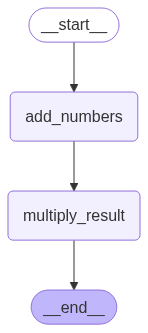

In [66]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [67]:
initial_state = MathState(num1=5, num2=3)
final_state = app.invoke(initial_state)

In [68]:
print(f"Final Result: {final_state}")

Final Result: num1=5.0 num2=3.0 sum_result=8.0 final_result=16.0


#### Implementation using TypedDict

In [69]:
from typing import TypedDict

class MathState(TypedDict):
    num1: float
    num2: float
    sum_result: float = 0
    final_result: float = 0

In [70]:
# Define node functions

def add_numbers(state: MathState) -> MathState:
    state['sum_result'] = state['num1'] + state['num2']
    return state 


def multiply_result(state: MathState) -> MathState:
    state['final_result'] = state['sum_result'] * 2 
    return state

In [71]:
from langgraph.graph import Graph, START, END
graph = Graph()

# Add Nodes
graph.add_node("add_numbers", add_numbers)
graph.add_node("multiply_result", multiply_result)

# Add Edges
graph.add_edge("add_numbers", "multiply_result")

# START
graph.add_edge(START, "add_numbers")

# END
graph.add_edge("multiply_result", END)

# Compile
app = graph.compile()

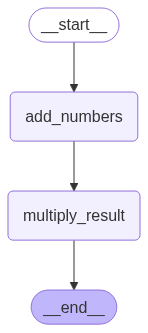

In [72]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [73]:
initial_state = MathState(num1=5, num2=3)
final_state = app.invoke(initial_state)

print(f"Final Result: {final_state}")

Final Result: {'num1': 5, 'num2': 3, 'sum_result': 8, 'final_result': 16}
